# Project 6 - Clustering

import all needed libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [157]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [60]:
# set options
pd.options.display.max_rows = 99999

In [223]:
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

## Dataset: fifa19

In [43]:
# load the dataset
fifa = pd.read_csv('fifa19.csv')

# we drop useless columns
fifa = fifa.drop(['Unnamed: 0','Photo','Flag','Club Logo','Real Face','Joined'],axis=1).set_index(keys=['ID'])

# loaned from: if player is loaned from another team. We change NaN to "No"
fifa.loc[:,'Loaned From'] = fifa.loc[:,'Loaned From'].fillna('not-loaned')

## Dataset: people

- May clustering help us identify patterns among young people? Does the pattern of music someone likes influences the movie taste?

- There are 150 dimensions in people's taste. Could we understand people's taste with a smaller number of dimensions? Meaning some of the questions were almost redundant?

- How to visualize it properly? 

- Were there people who intentionally randomly responded the survey? Is there a way to find them?


In [94]:
people = pd.read_csv('responses.csv')
descriptions = people.describe().T

In [66]:
people.shape

(1010, 150)

In [20]:
# it seems that the range from the dataset are from 15 years to 30 year. Adding an "age Group" woud be interesting, maybe?
descriptions.loc['Age']

count    1003.000000
mean       20.433699
std         2.828840
min        15.000000
25%        19.000000
50%        20.000000
75%        22.000000
max        30.000000
Name: Age, dtype: float64

In [107]:
#grouping age by categories:
my_dict = {'A':[15,16,17,18], 'B':[19,20,21,22], 'C':[23,24,25,26], 'D':[27,28,29,30]}
age_groups = {}

for key in my_dict.keys():
    for value in my_dict[key]:
        age_groups[value] = key

people.loc[:,'Age'] = people.loc[:,'Age'].fillna(round(people.loc[:,'Age'].mean()))
people['age_group'] = people.loc[:,'Age'].apply(lambda x: age_groups[x])

# indexing people by their Gender-Age
people.index = people.apply(lambda x: str(x.Gender) +'-'+ str(int(x.Age)), axis=1)

In [108]:
people.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,age_group
female-20,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats,B
female-19,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats,B
female-20,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats,B
female-22,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow,B
female-20,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow,B


In [124]:
people.select_dtypes(include=['object'])

,Smoking,Alcohol,Punctuality,Lying,Internet usage,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,age_group
female-20,never smoked,drink a lot,i am always on time,never,few hours a day,female,right handed,college/bachelor degree,no,village,block of flats,B
female-19,never smoked,drink a lot,i am often early,sometimes,few hours a day,female,right handed,college/bachelor degree,no,city,block of flats,B
female-20,tried smoking,drink a lot,i am often running late,sometimes,few hours a day,female,right handed,secondary school,no,city,block of flats,B
female-22,former smoker,drink a lot,i am often early,only to avoid hurting someone,most of the day,female,right handed,college/bachelor degree,yes,city,house/bungalow,B
female-20,tried smoking,social drinker,i am always on time,everytime it suits me,few hours a day,female,right handed,secondary school,no,village,house/bungalow,B
...,...,...,...,...,...,...,...,...,...,...,...,...
female-20,current smoker,drink a lot,i am often running late,everytime it suits me,few hours a day,female,right handed,secondary school,no,city,house/bungalow,B
male-27,never smoked,social drinker,i am often early,sometimes,less than an hour a day,male,left handed,masters degree,no,village,house/bungalow,D
female-18,tried smoking,social drinker,i am often running late,only to avoid hurting someone,most of the day,female,right handed,secondary school,yes,city,block of flats,A
female-25,tried smoking,social drinker,i am often running late,sometimes,most of the day,female,right handed,college/bachelor degree,no,city,block of flats,C


### May clustering help us identify patterns among young people?

In [207]:
# instantiate and fit the pca object
pca = PCA(n_components=2)
pca.fit(X_std)

print(f'each pca explains: {pca.explained_variance_ratio_}')
print(f'Both components explain together {round(pca.explained_variance_ratio_.sum()*100,2)}% of the data')

#now transform!
X_pca = pca.transform(X_std)

#check results
print("\noriginal shape:   ", X.shape)
print("\ntransformed shape:", X_pca.shape)

each pca explains: [0.06099874 0.04435244]
Both components explain together 10.54% of the data

original shape:    (675, 177)

transformed shape: (675, 2)


In [236]:
#creating a quicky, unpretentious Kmeans with N clusters, to check if we have the four age groups ('A','B','C','D')
def kmeans_clustering(people, clusters):
    
    people = people.dropna()

    X = pd.get_dummies(people)
    X_std = StandardScaler().fit_transform(X)

    kmeans = KMeans(clusters)

    kmeans.fit(X_std)

    labels = kmeans.labels_

    #add to the dataframe as groups
    people['label'] = labels + 1


    # generate distribution per group
    df = people.loc[:,['age_group','Gender','label']]
    df.index = df.apply(lambda x: str(x.Gender)[0:3].upper() +'-'+ str(x.age_group), axis=1)
    df = pd.pivot_table(data=df.loc[:,['age_group','label']],index=df.index,columns='label',aggfunc='count',fill_value=0)
    df = df.apply(lambda x: round(x / x.sum(),2), axis=1)

    #generate data for plot
    pc1 = X_pca[:,0]
    pc2 = X_pca[:,1]

    c_labels = kmeans.labels_

    return df, pc1, pc2, c_labels

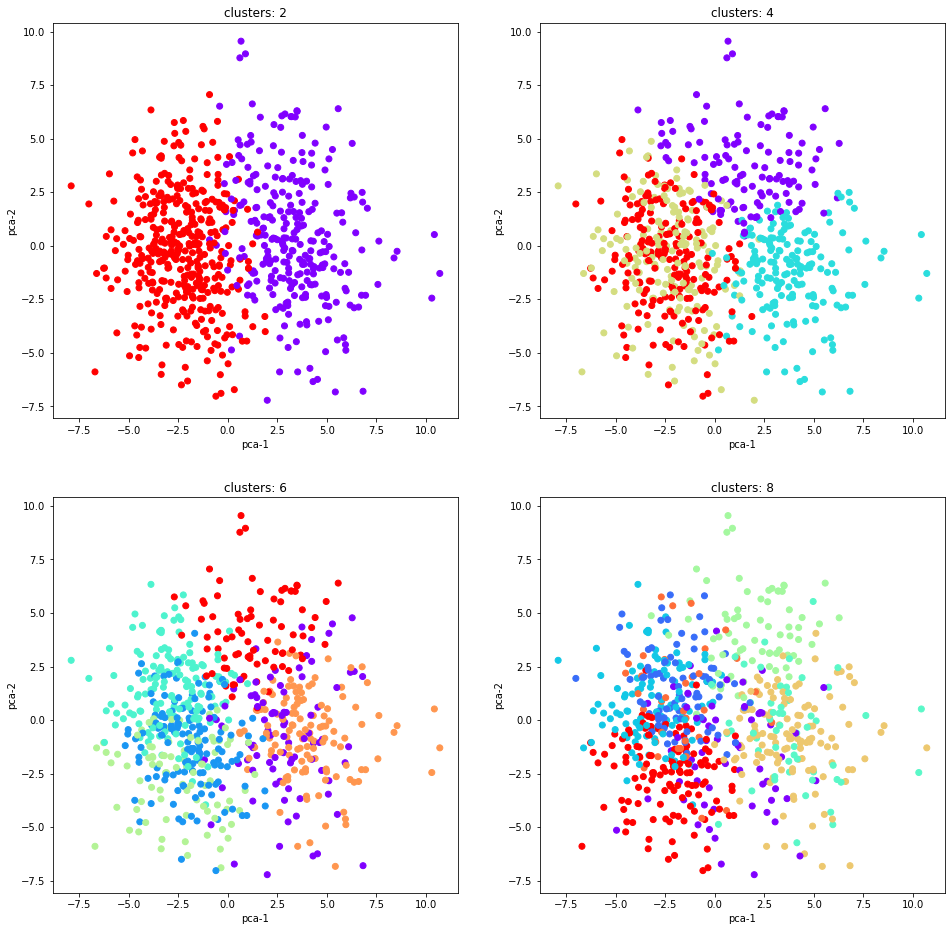

In [237]:
fit, axis = plt.subplots(nrows=2,ncols=2,figsize=(16,16))

axis = [axe for pair in axis for axe in pair]

for axe, clusters in zip(axis,[2,4,6,8]):
    df, pc1, pc2, c_labels = kmeans_clustering(people, clusters)
    axe.scatter(x=pc1, y=pc2, c=c_labels, cmap='rainbow')
    axe.set_title(f'clusters: {clusters}')
    axe.set_xlabel('pca-1')
    axe.set_ylabel('pca-2')

In [238]:
for axe, clusters in zip(axis,[2,4,8]):
    df, pc1, pc2, c_labels = kmeans_clustering(people, clusters)
    display(df)

age_group      
label         1     2
FEM-A      0.97  0.03
FEM-B      0.96  0.04
FEM-C      0.98  0.02
FEM-D      1.00  0.00
MAL-A      0.02  0.98
MAL-B      0.04  0.96
MAL-C      0.02  0.98
MAL-D      0.00  1.00

age_group                  
label         1     2     3     4
FEM-A      0.01  0.40  0.55  0.04
FEM-B      0.03  0.43  0.52  0.02
FEM-C      0.05  0.35  0.57  0.02
FEM-D      0.40  0.20  0.40  0.00
MAL-A      0.26  0.04  0.02  0.67
MAL-B      0.28  0.03  0.01  0.68
MAL-C      0.47  0.05  0.02  0.47
MAL-D      0.73  0.00  0.00  0.27

age_group                                          
label         1     2     3     4     5     6     7     8
FEM-A      0.32  0.00  0.06  0.00  0.00  0.16  0.14  0.32
FEM-B      0.26  0.01  0.12  0.00  0.00  0.36  0.20  0.04
FEM-C      0.08  0.00  0.18  0.00  0.28  0.20  0.25  0.02
FEM-D      0.00  0.00  0.07  0.00  0.87  0.07  0.00  0.00
MAL-A      0.07  0.28  0.15  0.43  0.00  0.00  0.00  0.07
MAL-B      0.01  0.45  0.08  0.42  0.00  0.02  0.01  0.01
MAL-C      0.02  0.37  0.16  0.26  0.14  0.02  0.02  0.00
MAL-D      0.00  0.20  0.00  0.13  0.67  0.00  0.00  0.00

In [ ]:
"""
The is clearly a distinction between Males and Females, when analyzing 2 clusters.

With 4 clusters, Females tend to be grouped in clusters 2 and 3, while males are concentrated on groups 1,2 and 4.

Groups % change according to age. For example, young FEM-A are 34:62 for clusters 2:3, while FEM-D is 50:50 for 2:3.

Therefore, sex and age are important factors at first, in this crude analysis.
"""

### Does the pattern of music someone likes influences the movie taste?

In [126]:
[print(i) for i in people.columns]

Music
Slow songs or fast songs
Dance
Folk
Country
Classical music
Musical
Pop
Rock
Metal or Hardrock
Punk
Hiphop, Rap
Reggae, Ska
Swing, Jazz
Rock n roll
Alternative
Latino
Techno, Trance
Opera
Movies
Horror
Thriller
Comedy
Romantic
Sci-fi
War
Fantasy/Fairy tales
Animated
Documentary
Western
Action
History
Psychology
Politics
Mathematics
Physics
Internet
PC
Economy Management
Biology
Chemistry
Reading
Geography
Foreign languages
Medicine
Law
Cars
Art exhibitions
Religion
Countryside, outdoors
Dancing
Musical instruments
Writing
Passive sport
Active sport
Gardening
Celebrities
Shopping
Science and technology
Theatre
Fun with friends
Adrenaline sports
Pets
Flying
Storm
Darkness
Heights
Spiders
Snakes
Rats
Ageing
Dangerous dogs
Fear of public speaking
Smoking
Alcohol
Healthy eating
Daily events
Prioritising workload
Writing notes
Workaholism
Thinking ahead
Final judgement
Reliability
Keeping promises
Loss of interest
Friends versus money
Funniness
Fake
Criminal damage
Decision making
Elec

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [ ]:
'Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance', 'Opera', 'Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Action', 